Imports

In [483]:
import os
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random

Base

In [485]:
df = pd.read_excel("normalizado-Amaro.xlsx",header = None)
len(df)

611

In [486]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,Normal,797.766418,797.683644,797.613187,797.693186,797.805090,797.753375,797.563333,798.000149,798.545036,...,592.738705,592.581189,592.574241,592.628389,592.679977,592.413202,592.498636,592.718366,592.774764,592.758179
1,Normal,592.893188,592.957595,593.003784,593.005584,592.966058,592.882190,592.813000,592.825978,592.895234,...,794.506726,794.468904,794.506192,794.539992,794.504967,794.480642,794.502439,794.498750,794.422782,794.261597
2,Normal,794.196960,794.211399,794.274985,794.233181,794.141157,794.145646,794.147134,794.578599,795.204511,...,589.918523,589.755735,589.709232,589.782470,589.833534,589.725387,589.636634,589.647622,589.832054,590.020081
3,Normal,590.020813,589.980242,589.939066,589.955064,589.928249,589.954199,589.980573,590.023051,590.055368,...,798.370259,798.434964,798.499558,798.577617,798.632516,798.559296,798.447329,798.398584,798.311089,798.115662
4,Normal,798.007568,797.974260,797.890975,797.847882,797.785183,797.676456,797.710671,797.755902,797.747933,...,590.733121,590.653185,590.584245,590.623168,590.698066,590.614059,590.577872,590.593340,590.600638,590.630615


In [487]:
df_x = df.drop([0],axis=1)

In [488]:
print(df[0].unique())

['Normal' 'Duplo' 'Ritmo']


In [489]:
# Classificando Normal = 0 e outros comportamentos como = 1
df['fadiga'] = [0 if x == 'Normal' else 1 for x in df[0]]
df['classes_completa'] = [0 if x == 'Normal' else 1 if x == 'Duplo' else 2 for x in df[0]]
df_y =  df['fadiga']
df_y_real = df['classes_completa']

In [490]:
count = 0
for i in nova_df_y:
    if i == 0:
        count += 1
print(f'% de Normal: {count/len(nova_df_y) * 100}')

% de Normal: 88.54337152209493


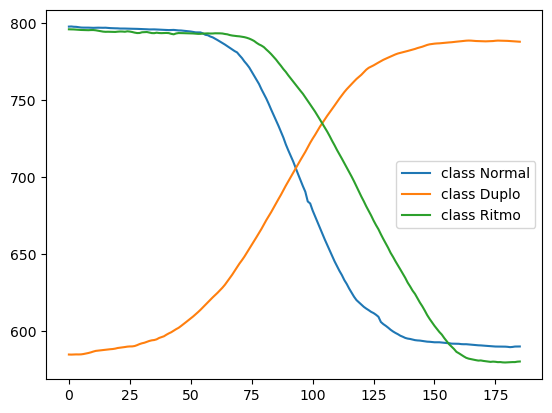

In [491]:
#Mostrando exemplos de cada classe
classes = np.unique(df_y_real, axis=0)
idx = np.random.default_rng(seed=42).permutation(len(nova_df_x))#np.random.permutation(len(nova_df_x))
nova_df_x = df_x.values[idx]
nova_df_y = df_y_real.values[idx]
plt.figure()
for c in classes:
    c_x_train = nova_df_x[nova_df_y == c]
    if c == 0:
        text = 'Normal'
    if c == 1:
        text = 'Duplo'
    if c == 2:
        text = 'Ritmo'
    plt.plot(c_x_train[0], label="class " + str(text))
plt.legend(loc="best")
plt.show()
plt.close()

Treino e Teste

In [493]:
#Randomizar a ordem
idx = np.random.permutation(len(nova_df_x))
nova_df_x = df_x.values[idx]
nova_df_y = df_y.values[idx]

#Separar em Treino (70%), Validação (20%) e Teste (10%)
n = len(nova_df_x)
train_df_x = nova_df_x[0:int(n*0.7)]
val_df_x = nova_df_x[int(n*0.7):int(n*0.9)]
test_df_x = nova_df_x[int(n*0.9):]

train_df_y = nova_df_y[0:int(n*0.7)]
val_df_y = nova_df_y[int(n*0.7):int(n*0.9)]
test_df_y = nova_df_y[int(n*0.9):]

train_x,train_y = train_df_x,train_df_y
val_x,val_y = val_df_x,val_df_y
test_x,test_y = test_df_x,test_df_y
num_features = test_df_x.shape[1]

Normalização

In [495]:
train_mean = train_x.mean()
train_std = train_x.std()

train_x = (train_x - train_mean) / train_std
val_x = (val_x - train_mean) / train_std
test_x = (test_x - train_mean) / train_std

In [496]:
num_classes = len(np.unique(train_y))

In [497]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
val_x = val_x.reshape((val_x.shape[0], val_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [498]:
train_x.shape

(427, 186, 1)

Modelo

In [500]:
def make_model_lstm(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    lstm1 = tf.keras.layers.LSTM(16,return_sequences=True)(input_layer)
    lstm2 = tf.keras.layers.LSTM(8)(lstm1)
    output_layer = tf.keras.layers.Dense(num_classes)(lstm2)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [501]:
def make_model_rnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    rnn1 = tf.keras.layers.SimpleRNN(16,return_sequences=True)(input_layer)
    rnn2 = tf.keras.layers.SimpleRNN(8)(rnn1)
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(rnn2)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [502]:
def make_model_cnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    cn2 = tf.keras.layers.Conv1D(32,kernel_size=3,padding="same")(input_layer)
    max = tf.keras.layers.MaxPooling1D()(cn2)
    flat = tf.keras.layers.Flatten()(max)
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(flat)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [503]:
def make_model_fcnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.ReLU()(conv3)

    gap = tf.keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(gap)

    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [504]:
model_lstm = make_model_lstm(input_shape= train_x.shape[1:])

model_lstm.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 186, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 186, 16)             │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,970 (7.70 KB)

 Trainable params: 1,970 (7.70 KB)

 Non-trainable params: 0 (0.00 B)

In [505]:
model_rnn = make_model_rnn(input_shape= train_x.shape[1:])

model_rnn.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 186, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 186, 16)             │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 506 (1.98 KB)

 Trainable params: 506 (1.98 KB)

 Non-trainable params: 0 (0.00 B)

In [506]:
model_cnn = make_model_cnn(input_shape= train_x.shape[1:])

model_cnn.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 186, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 186, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 93, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2976)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │           5,954 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,082 (23.76 KB)

 Trainable params: 6,082 (23.76 KB)

 Non-trainable params: 0 (0.00 B)

Parametros utilizados para rodar as Épocas

In [508]:
epochs = 50
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
]

LSTM

In [570]:
model_lstm.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[
        "sparse_categorical_accuracy"
    ]
)
history = model_lstm.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.8756 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.9001 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - l

In [511]:
model_lstm = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_lstm.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.9147
Test accuracy 0.9032257795333862
Test loss 0.6931471824645996


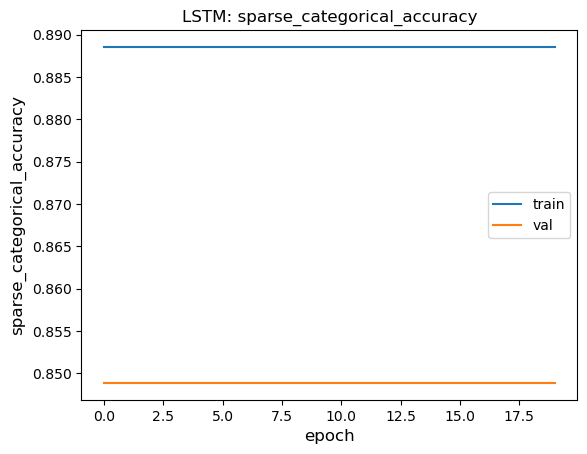

In [572]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("LSTM: " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

RNN

In [514]:
model_rnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_rnn.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.6800 - sparse_categorical_accuracy: 0.5849 - val_loss: 0.6314 - val_sparse_categorical_accuracy: 0.6744 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.6464 - sparse_categorical_accuracy: 0.5684 - val_loss: 0.5796 - val_sparse_categorical_accuracy: 0.6744 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.5814 - sparse_categorical_accuracy: 0.6117 - val_loss: 0.4866 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.4916 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.4060 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.4161 - sparse_categorical_accuracy: 0.8577 - val_loss: 0.3708 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - l

In [515]:
model_rnn = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_rnn.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2783 - sparse_categorical_accuracy: 0.9147
Test accuracy 0.9032257795333862
Test loss 0.28385671973228455


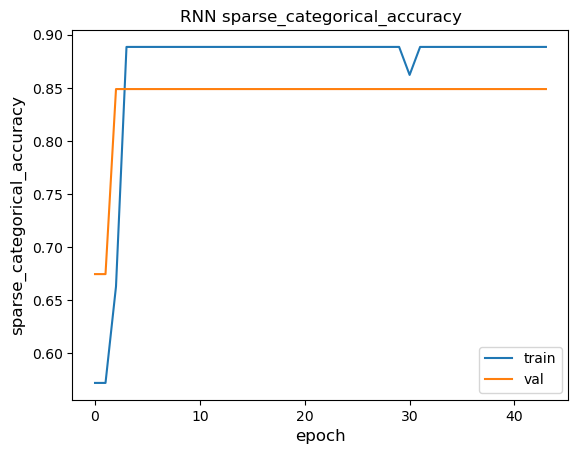

In [516]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("RNN " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

CNN

In [518]:
model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_cnn.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.7116 - sparse_categorical_accuracy: 0.5605 - val_loss: 0.5623 - val_sparse_categorical_accuracy: 0.6744 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.6268 - sparse_categorical_accuracy: 0.6252 - val_loss: 0.4825 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3975 - sparse_categorical_accuracy: 0.8878 - val_loss: 0.3239 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2907 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.3642 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3068 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.3108 - val_sparse_categorical_accuracy: 0.8488 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

In [519]:
model_cnn = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_cnn.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2875 - sparse_categorical_accuracy: 0.9147
Test accuracy 0.9032257795333862
Test loss 0.2859932482242584


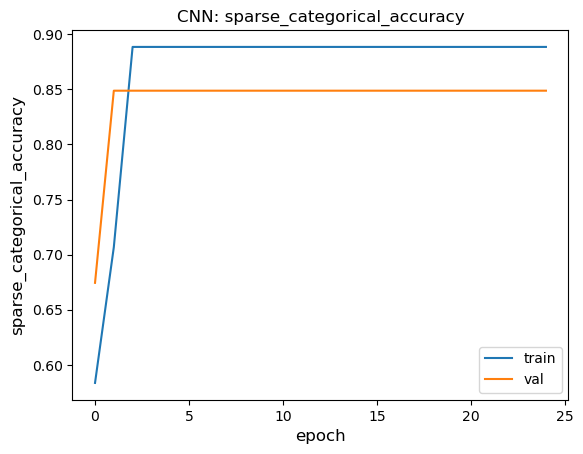

In [520]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("CNN: " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()